In [7]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
churn_df = pd.read_csv("Churn_Modelling.csv")

In [14]:
churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
churn_df = churn_df.drop(["CustomerId", "RowNumber" ,"Surname"], axis=1)

In [17]:
churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
X_train, X_test, y_train, y_test = train_test_split(churn_df.drop('Exited', axis=1), churn_df['Exited'], test_size=0.2, random_state=42)

In [20]:
col_ohe = ['Geography']
col_ord = ['Gender']
Std_col = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [21]:
CC = ColumnTransformer(transformers=[("OHE_",OneHotEncoder(), col_ohe) , ("Ord_", OrdinalEncoder(), col_ord)
, ("Standard", StandardScaler(), Std_col)])

In [22]:
data = CC.fit_transform(X_train)

In [23]:
data

array([[ 1.        ,  0.        ,  0.        , ..., -0.6557859 ,
        -1.21847056,  1.36766974],
       [ 0.        ,  1.        ,  0.        , ...,  0.29493847,
         0.69683765,  1.6612541 ],
       [ 0.        ,  0.        ,  1.        , ..., -1.41636539,
         0.61862909, -0.25280688],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.08535128,
        -1.21847056, -0.1427649 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.3900109 ,
         1.8272593 , -0.05082558],
       [ 0.        ,  1.        ,  0.        , ...,  1.15059039,
         1.1497197 , -0.81456811]])

In [24]:
X_train_preprocessed = pd.DataFrame(data, columns=CC.get_feature_names_out())

In [25]:
X_train_preprocessed.head()

,OHE___Geography_France,OHE___Geography_Germany,OHE___Geography_Spain,Ord___Gender,Standard__CreditScore,Standard__Age,Standard__Balance,Standard__EstimatedSalary
0,1.0,0.0,0.0,1.0,0.356500,-0.655786,-1.218471,1.367670
1,0.0,1.0,0.0,1.0,-0.203898,0.294938,0.696838,1.661254
2,0.0,0.0,1.0,1.0,-0.961472,-1.416365,0.618629,-0.252807
3,1.0,0.0,0.0,0.0,-0.940717,-1.131148,0.953212,0.915393
4,1.0,0.0,0.0,1.0,-1.397337,1.625953,1.057449,-1.059600


In [26]:
data_test = CC.transform(X_test)
X_test_preprocessed = pd.DataFrame(data_test, columns=CC.get_feature_names_out())

In [27]:
X_test_preprocessed.head()

,OHE___Geography_France,OHE___Geography_Germany,OHE___Geography_Spain,Ord___Gender,Standard__CreditScore,Standard__Age,Standard__Balance,Standard__EstimatedSalary
0,0.0,1.0,0.0,1.0,-0.577496,-0.655786,0.329937,-1.019605
1,1.0,0.0,0.0,1.0,-0.297297,0.390011,-1.218471,0.798883
2,0.0,0.0,1.0,0.0,-0.525607,0.485083,-1.218471,-0.727980
3,0.0,1.0,0.0,1.0,-1.511492,1.911170,0.689272,1.221387
4,0.0,0.0,1.0,0.0,-0.951094,-1.131148,0.782839,0.247560


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_preprocessed, y_train)

y_pred = log_reg.predict(X_test_preprocessed)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.7985
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.45      0.11      0.18       393

    accuracy                           0.80      2000
   macro avg       0.63      0.54      0.53      2000
weighted avg       0.74      0.80      0.75      2000



In [36]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_preprocessed, y_train)

y_pred_rf = rf_classifier.predict(X_test_preprocessed)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.822
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1607
           1       0.58      0.33      0.42       393

    accuracy                           0.82      2000
   macro avg       0.72      0.64      0.66      2000
weighted avg       0.80      0.82      0.80      2000



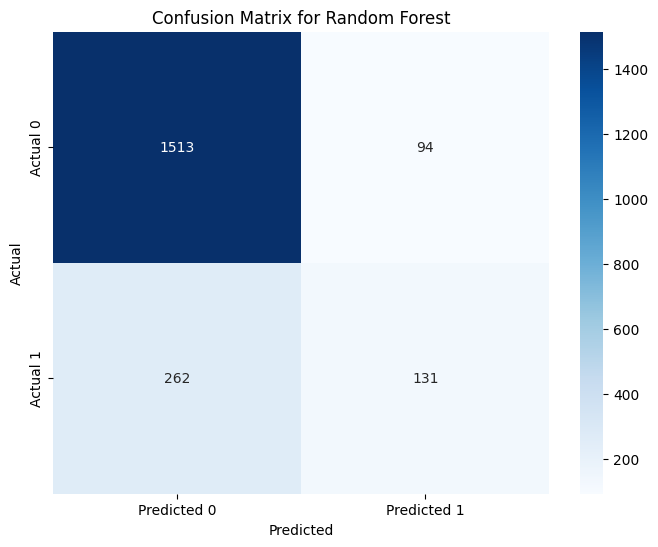

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

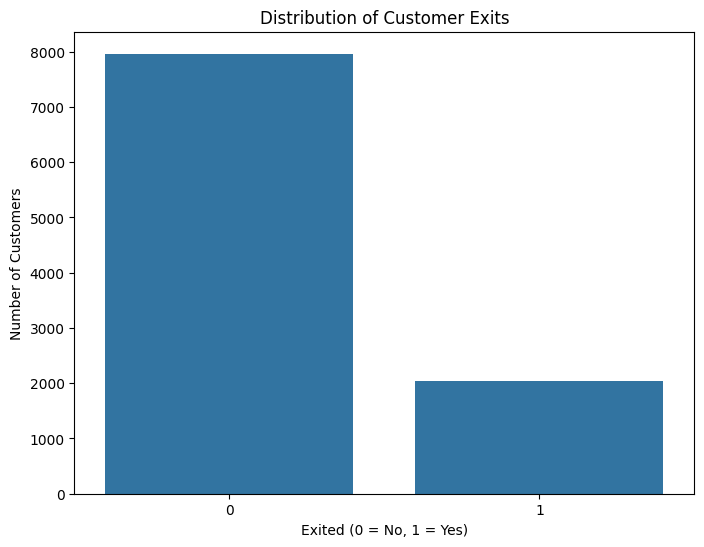

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=churn_df)
plt.title('Distribution of Customer Exits')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()

In [33]:
from imblearn.over_sampling import SMOTE

X = X_train_preprocessed
y = y_train

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

log_reg_smote = LogisticRegression(random_state=42)
log_reg_smote.fit(X_resampled, y_resampled)

y_pred_smote = log_reg_smote.predict(X_test_preprocessed)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"Accuracy (SMOTE): {accuracy_smote}")

print(classification_report(y_test, y_pred_smote))


Accuracy (SMOTE): 0.711
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1607
           1       0.38      0.71      0.49       393

    accuracy                           0.71      2000
   macro avg       0.64      0.71      0.65      2000
weighted avg       0.81      0.71      0.74      2000



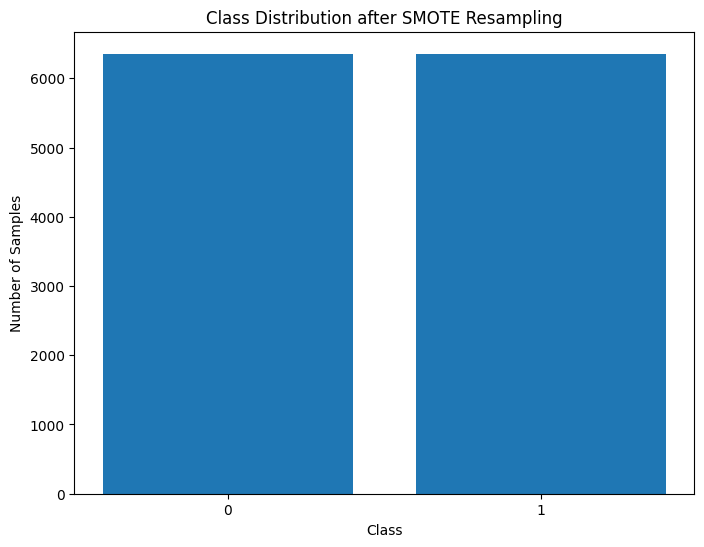

In [39]:
class_counts = y_resampled.value_counts()
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution after SMOTE Resampling')
plt.xticks(class_counts.index)
plt.show()